In [1]:
import os, sys
sys.path.append(os.path.abspath('../'))
from utils.rl.hypervolume2d import hypervolume2d

def compute_hypervolume(df, antiutopia, utopia):
    array = df.drop('Algorithms', axis=1)
    array = array.values
    return hypervolume2d(array, antiutopia, utopia)

# Discrete Dam Problem

In [2]:
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_discrete_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea-12-06-2022-20-55_0.tar.gz',
 'ea-12-06-2022-20-55_1.tar.gz',
 'ea-12-06-2022-20-55_2.tar.gz',
 'ea-12-06-2022-20-55_3.tar.gz',
 'ea-12-06-2022-20-55_4.tar.gz',
 'nes-12-06-2022-00-38_best.csv',
 'nes-12-06-2022-00-38_high.csv',
 'repsep-12-06-2022-00-38_best.csv',
 'repsep-12-06-2022-00-38_high.csv']

In [3]:
ea=[]
for i in range(1, 6):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea
# 0:01:58

ea-12-06-2022-20-55_0.tar.gz
ea-12-06-2022-20-55_1.tar.gz
ea-12-06-2022-20-55_2.tar.gz
ea-12-06-2022-20-55_3.tar.gz
ea-12-06-2022-20-55_4.tar.gz


,utility,reliability,Algorithms
0,0.000000,-9.831446,Epsilon-NSGA-II
1,-0.068554,-9.731446,Epsilon-NSGA-II
2,-0.505661,-9.531446,Epsilon-NSGA-II
3,-0.237107,-9.631446,Epsilon-NSGA-II
4,-0.874214,-9.431446,Epsilon-NSGA-II


In [4]:
nes = pd.read_csv(results_path + files[6])
nes["Algorithms"]="MO-NES"
nes
# 0:00:07

,utility,reliability,Algorithms
0,-0.505661,-9.531446,MO-NES
1,-0.068554,-9.731446,MO-NES
2,-0.237107,-9.631446,MO-NES
3,-0.874214,-9.431446,MO-NES
4,0.000000,-9.831446,MO-NES


In [5]:
repsep = pd.read_csv(results_path + files[8])
repsep["Algorithms"]="MO-eREPS"
repsep
# 0:00:07

,utility,reliability,Algorithms
0,-0.068554,-9.731446,MO-eREPS
1,-0.505661,-9.531446,MO-eREPS
2,0.000000,-9.831446,MO-eREPS
3,-0.237107,-9.631446,MO-eREPS
4,-0.874214,-9.431446,MO-eREPS


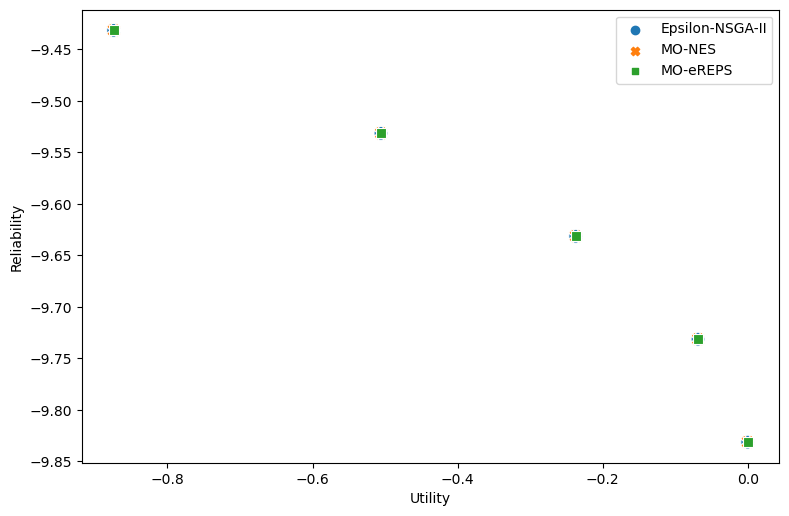

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [8]:
compute_hypervolume(nes, np.array([-1, -10]), np.array([0, -9]))

0.3999999999999999

# Robust Dam Problem (random initial state)

In [6]:
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_robust_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_random_inflow-13-06-2022-12-51_0.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_1.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_10.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_11.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_2.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_3.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_4.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_5.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_6.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_7.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_8.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_9.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_0.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_1.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_10.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_11.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_12.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_13.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_14.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_15.tar.gz',
 'ea_r

In [7]:
ea=[]
for i in range(35, 36):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea

ea_random_initial-12-06-2022-22-10_0.tar.gz


,utility,reliability,Algorithms
0,-0.057307,-9.942167,Epsilon-NSGA-II


In [25]:
path = files[65]
nes = pd.read_csv(results_path + path)
nes["Algorithms"]="MO-NES"
print(path)
nes

nes_random_initial-13-06-2022-21-17_high.csv


,utility,reliability,Algorithms
0,-0.759367,-10.388666,MO-NES
1,-0.629347,-10.864333,MO-NES
2,-2.206307,-8.810854,MO-NES
3,-0.568888,-11.323303,MO-NES
4,-1.815731,-8.913170,MO-NES
5,-0.625125,-11.143703,MO-NES
6,-1.549611,-9.190916,MO-NES
7,-0.679644,-10.693863,MO-NES
8,-3.187325,-8.696336,MO-NES
9,-0.776391,-10.362565,MO-NES


In [26]:
path = files[73]
repsep = pd.read_csv(results_path + path)
repsep["Algorithms"]="MO-eREPS"
print(path)
repsep

repsep_random_initial-13-06-2022-21-16_high.csv


,utility,reliability,Algorithms
0,-2.250628,-8.985427,MO-eREPS
1,-0.739031,-10.308627,MO-eREPS
2,-0.606063,-10.528149,MO-eREPS
3,-0.563083,-11.321521,MO-eREPS
4,-0.861763,-10.014403,MO-eREPS
5,-1.305176,-9.430285,MO-eREPS
6,-2.287339,-8.764261,MO-eREPS
7,-0.743823,-10.195791,MO-eREPS
8,-0.661684,-10.382402,MO-eREPS
9,-1.047001,-9.769047,MO-eREPS


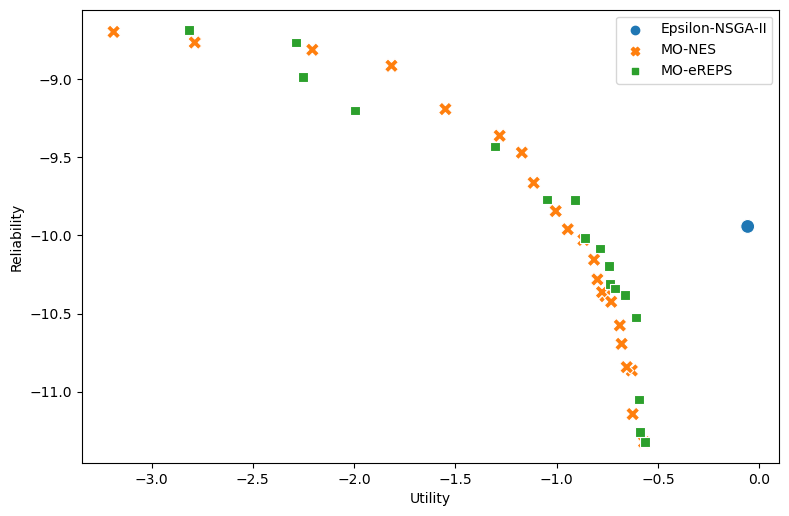

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [28]:
ea_avg=[]
for i in range(36, 60):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea_avg.append(all_outcomes)
    print(files[i])
ea_avg=pd.DataFrame(ea_avg)
ea_avg["Algorithms"]="Epsilon-NSGA-II_avg"
ea_avg
# 0:04:06

ea_random_initial_avg-12-06-2022-22-29_0.tar.gz
ea_random_initial_avg-12-06-2022-22-29_1.tar.gz
ea_random_initial_avg-12-06-2022-22-29_10.tar.gz
ea_random_initial_avg-12-06-2022-22-29_11.tar.gz
ea_random_initial_avg-12-06-2022-22-29_12.tar.gz
ea_random_initial_avg-12-06-2022-22-29_13.tar.gz
ea_random_initial_avg-12-06-2022-22-29_14.tar.gz
ea_random_initial_avg-12-06-2022-22-29_15.tar.gz
ea_random_initial_avg-12-06-2022-22-29_16.tar.gz
ea_random_initial_avg-12-06-2022-22-29_17.tar.gz
ea_random_initial_avg-12-06-2022-22-29_18.tar.gz
ea_random_initial_avg-12-06-2022-22-29_19.tar.gz
ea_random_initial_avg-12-06-2022-22-29_2.tar.gz
ea_random_initial_avg-12-06-2022-22-29_20.tar.gz
ea_random_initial_avg-12-06-2022-22-29_21.tar.gz
ea_random_initial_avg-12-06-2022-22-29_22.tar.gz
ea_random_initial_avg-12-06-2022-22-29_23.tar.gz
ea_random_initial_avg-12-06-2022-22-29_3.tar.gz
ea_random_initial_avg-12-06-2022-22-29_4.tar.gz
ea_random_initial_avg-12-06-2022-22-29_5.tar.gz
ea_random_initial_avg-12-0

,utility,reliability,Algorithms
0,-0.088587,-9.904992,Epsilon-NSGA-II_avg
1,-0.129736,-9.878136,Epsilon-NSGA-II_avg
2,-0.175894,-9.868136,Epsilon-NSGA-II_avg
3,-0.528067,-9.748136,Epsilon-NSGA-II_avg
4,-0.475367,-9.755437,Epsilon-NSGA-II_avg
5,-0.752229,-9.687391,Epsilon-NSGA-II_avg
6,-0.969091,-9.627391,Epsilon-NSGA-II_avg
7,-0.692229,-9.695437,Epsilon-NSGA-II_avg
8,-0.311205,-9.808136,Epsilon-NSGA-II_avg
9,-0.293898,-9.825437,Epsilon-NSGA-II_avg


In [35]:
path = files[66]
nes_avg = pd.read_csv(results_path + path)
nes_avg["Algorithms"]="MO-NES_avg"
print(path)
nes_avg
# 0:00:15

nes_random_initial_avg-13-06-2022-21-18_best.csv


,utility,reliability,Algorithms
0,-1.071013,-9.819782,MO-NES_avg
1,-1.538891,-9.187820,MO-NES_avg
2,-1.880156,-8.868481,MO-NES_avg
3,-0.852394,-10.103607,MO-NES_avg
4,-0.716789,-10.698976,MO-NES_avg
5,-0.771020,-10.464594,MO-NES_avg
6,-2.385594,-8.698678,MO-NES_avg
7,-1.440971,-9.517410,MO-NES_avg
8,-0.881733,-10.085445,MO-NES_avg
9,-2.455756,-8.677806,MO-NES_avg


In [36]:
path = files[75]
repsep_avg = pd.read_csv(results_path + path)
repsep_avg["Algorithms"]="MO-eREPS_avg"
print(path)
repsep_avg
# 0:00:15

repsep_random_initial_avg-13-06-2022-21-17_high.csv


,utility,reliability,Algorithms
0,-2.115711,-8.839796,MO-eREPS_avg
1,-1.031555,-9.540502,MO-eREPS_avg
2,-0.738280,-10.421814,MO-eREPS_avg
3,-1.381872,-9.389904,MO-eREPS_avg
4,-2.206307,-8.810854,MO-eREPS_avg
5,-0.780356,-10.308805,MO-eREPS_avg
6,-0.995951,-9.741529,MO-eREPS_avg
7,-0.857556,-9.952582,MO-eREPS_avg
8,-2.524800,-8.654839,MO-eREPS_avg
9,-0.603474,-10.892474,MO-eREPS_avg


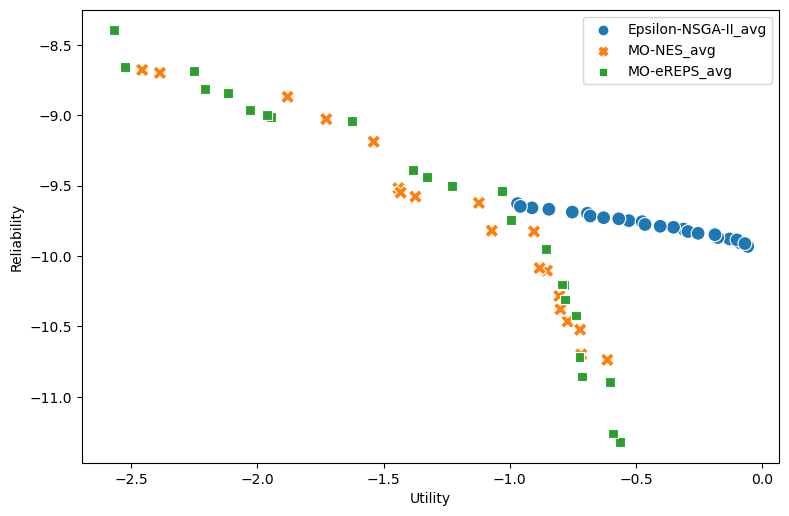

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea_avg, nes_avg, repsep_avg])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

# Robust Dam Problem (random inflow)

In [40]:
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_robust_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea_random_inflow-13-06-2022-12-51_0.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_1.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_10.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_11.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_2.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_3.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_4.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_5.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_6.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_7.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_8.tar.gz',
 'ea_random_inflow-13-06-2022-12-51_9.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_0.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_1.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_10.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_11.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_12.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_13.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_14.tar.gz',
 'ea_random_inflow_avg-13-06-2022-17-55_15.tar.gz',
 'ea_r

In [41]:
ea=[]
for i in range(1, 13):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea
# 2:44:18

ea_random_inflow-13-06-2022-12-51_0.tar.gz
ea_random_inflow-13-06-2022-12-51_1.tar.gz
ea_random_inflow-13-06-2022-12-51_10.tar.gz
ea_random_inflow-13-06-2022-12-51_11.tar.gz
ea_random_inflow-13-06-2022-12-51_2.tar.gz
ea_random_inflow-13-06-2022-12-51_3.tar.gz
ea_random_inflow-13-06-2022-12-51_4.tar.gz
ea_random_inflow-13-06-2022-12-51_5.tar.gz
ea_random_inflow-13-06-2022-12-51_6.tar.gz
ea_random_inflow-13-06-2022-12-51_7.tar.gz
ea_random_inflow-13-06-2022-12-51_8.tar.gz
ea_random_inflow-13-06-2022-12-51_9.tar.gz


,utility,reliability,Algorithms
0,-1.660702,-10.219361,Epsilon-NSGA-II
1,-1.037084,-10.383098,Epsilon-NSGA-II
2,-0.958424,-10.443713,Epsilon-NSGA-II
3,-1.491326,-10.204458,Epsilon-NSGA-II
4,-1.013438,-10.424583,Epsilon-NSGA-II
5,-0.998231,-10.469646,Epsilon-NSGA-II
6,-0.988441,-10.416100,Epsilon-NSGA-II
7,-0.963805,-10.471281,Epsilon-NSGA-II
8,-0.975461,-10.434882,Epsilon-NSGA-II
9,-0.989468,-10.402677,Epsilon-NSGA-II


In [52]:
path = files[60]
nes = pd.read_csv(results_path + path)
nes["Algorithms"]="MO-NES"
print(path)
nes

nes_random_inflow-13-06-2022-21-36_best.csv


,utility,reliability,Algorithms
0,-1.282335,-9.774419,MO-NES
1,-1.121507,-9.970082,MO-NES
2,-1.344414,-9.711342,MO-NES
3,-1.195749,-9.868284,MO-NES
4,-1.402653,-9.679259,MO-NES
...,...,...,...
86,-2.101309,-9.464504,MO-NES
87,-1.212487,-9.845290,MO-NES
88,-0.824054,-10.715411,MO-NES
89,-1.405068,-9.669448,MO-NES


In [53]:
path = files[69]
repsep = pd.read_csv(results_path + path)
repsep["Algorithms"]="MO-eREPS"
print(path)
repsep

repsep_random_inflow-13-06-2022-21-42_high.csv


,utility,reliability,Algorithms
0,-1.263537,-9.798979,MO-eREPS
1,-1.727184,-9.611853,MO-eREPS
2,-1.154593,-9.922962,MO-eREPS
3,-1.062162,-10.054578,MO-eREPS
4,-1.004073,-10.182663,MO-eREPS
...,...,...,...
91,-1.138347,-9.937601,MO-eREPS
92,-0.865734,-10.556250,MO-eREPS
93,-1.187507,-9.865304,MO-eREPS
94,-1.046470,-10.072679,MO-eREPS


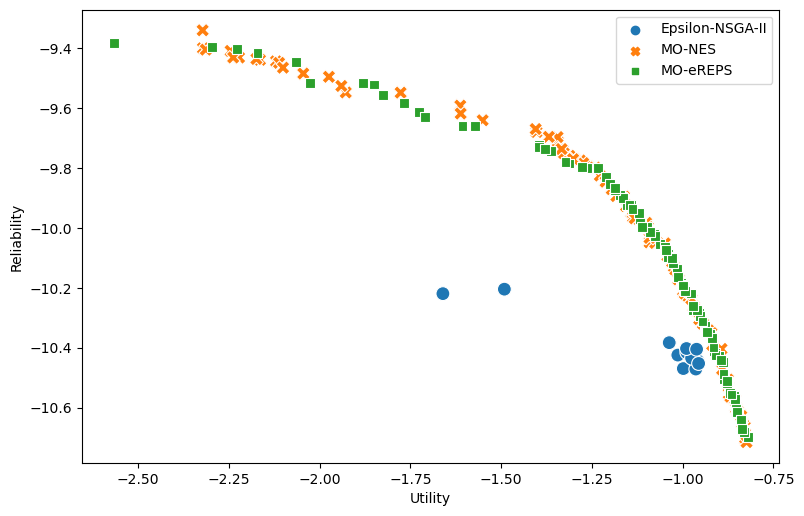

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [56]:
ea_avg=[]
for i in range(13, 35):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea_avg.append(all_outcomes)
    print(files[i])
ea_avg=pd.DataFrame(ea_avg)
ea_avg["Algorithms"]="Epsilon-NSGA-II_avg"
ea_avg
# 2:49:00

ea_random_inflow_avg-13-06-2022-17-55_0.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_1.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_10.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_11.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_12.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_13.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_14.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_15.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_16.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_17.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_18.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_19.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_2.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_20.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_21.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_3.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_4.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_5.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_6.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_7.tar.gz
ea_random_inflow_avg-13-06-2022-17-55_8.tar.gz
e

,utility,reliability,Algorithms
0,-1.783381,-10.254516,Epsilon-NSGA-II_avg
1,-2.245383,-10.043816,Epsilon-NSGA-II_avg
2,-0.970215,-10.382435,Epsilon-NSGA-II_avg
3,-0.977204,-10.375724,Epsilon-NSGA-II_avg
4,-1.549719,-10.151147,Epsilon-NSGA-II_avg
5,-0.983933,-10.409545,Epsilon-NSGA-II_avg
6,-1.436689,-10.166302,Epsilon-NSGA-II_avg
7,-0.962195,-10.398314,Epsilon-NSGA-II_avg
8,-1.309770,-10.197487,Epsilon-NSGA-II_avg
9,-0.982661,-10.346121,Epsilon-NSGA-II_avg


In [63]:
path = files[62]
nes_avg = pd.read_csv(results_path + path)
nes_avg["Algorithms"]="MO-NES_avg"
print(path)
nes_avg
# 0:03:17

nes_random_inflow_avg-13-06-2022-21-23_best.csv


,utility,reliability,Algorithms
0,-0.872664,-10.519440,MO-NES_avg
1,-0.954562,-10.323262,MO-NES_avg
2,-1.155981,-9.934806,MO-NES_avg
3,-1.174464,-9.917085,MO-NES_avg
4,-1.687725,-9.559657,MO-NES_avg
...,...,...,...
97,-2.104550,-9.454489,MO-NES_avg
98,-2.141065,-9.452715,MO-NES_avg
99,-0.995785,-10.205300,MO-NES_avg
100,-1.198794,-9.866319,MO-NES_avg


In [64]:
path = files[70]
repsep_avg = pd.read_csv(results_path + path)
repsep_avg["Algorithms"]="MO-eREPS_avg"
print(path)
repsep_avg
# 0:02:30

repsep_random_inflow_avg-13-06-2022-21-20_best.csv


,utility,reliability,Algorithms
0,-2.342667,-9.370647,MO-eREPS_avg
1,-0.836439,-10.666003,MO-eREPS_avg
2,-0.904042,-10.471988,MO-eREPS_avg
3,-1.116383,-9.990802,MO-eREPS_avg
4,-1.046448,-10.103159,MO-eREPS_avg
...,...,...,...
87,-0.838492,-10.628597,MO-eREPS_avg
88,-2.156384,-9.429229,MO-eREPS_avg
89,-0.999917,-10.224674,MO-eREPS_avg
90,-0.824054,-10.715411,MO-eREPS_avg


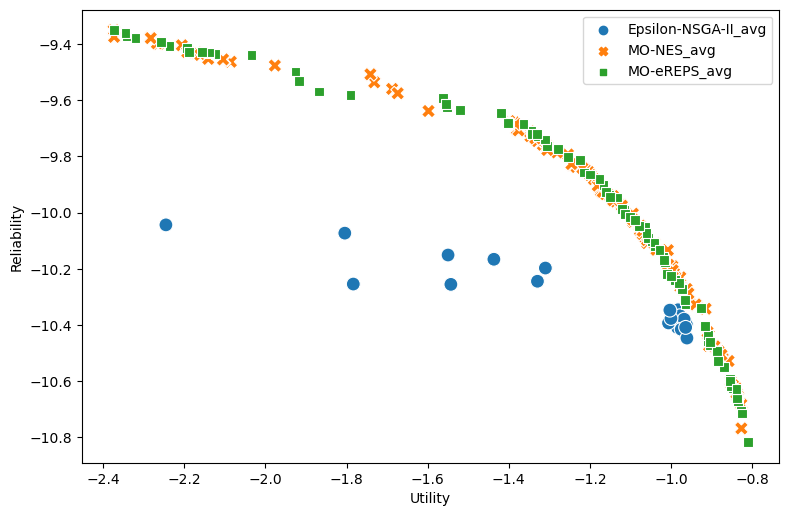

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea_avg, nes_avg, repsep_avg])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

# Robust Dam Problem (deep)

In [10]:
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_deep_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea-15-06-2022-14-30_0.tar.gz',
 'ea-15-06-2022-14-30_1.tar.gz',
 'ea-15-06-2022-14-30_2.tar.gz',
 'ea-15-06-2022-14-30_3.tar.gz',
 'ea-15-06-2022-14-30_4.tar.gz',
 'ea-15-06-2022-14-30_5.tar.gz',
 'ea-15-06-2022-14-30_6.tar.gz',
 'ea-15-06-2022-14-30_7.tar.gz',
 'ea-15-06-2022-14-30_8.tar.gz',
 'ea-15-06-2022-14-30_9.tar.gz',
 'ea_avg-15-06-2022-14-32_0.tar.gz',
 'ea_avg-15-06-2022-14-32_1.tar.gz',
 'ea_avg-15-06-2022-14-32_10.tar.gz',
 'ea_avg-15-06-2022-14-32_11.tar.gz',
 'ea_avg-15-06-2022-14-32_12.tar.gz',
 'ea_avg-15-06-2022-14-32_13.tar.gz',
 'ea_avg-15-06-2022-14-32_14.tar.gz',
 'ea_avg-15-06-2022-14-32_15.tar.gz',
 'ea_avg-15-06-2022-14-32_16.tar.gz',
 'ea_avg-15-06-2022-14-32_17.tar.gz',
 'ea_avg-15-06-2022-14-32_2.tar.gz',
 'ea_avg-15-06-2022-14-32_3.tar.gz',
 'ea_avg-15-06-2022-14-32_4.tar.gz',
 'ea_avg-15-06-2022-14-32_5.tar.gz',
 'ea_avg-15-06-2022-14-32_6.tar.gz',
 'ea_avg-15-06-2022-14-32_7.tar.gz',
 'ea_avg-15-06-2022-14-32_8.tar.gz',
 'ea_avg-15-06-2022

In [11]:
ea=[]
for i in range(1, 11):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea
# 2:44:18

ea-15-06-2022-14-30_0.tar.gz
ea-15-06-2022-14-30_1.tar.gz
ea-15-06-2022-14-30_2.tar.gz
ea-15-06-2022-14-30_3.tar.gz
ea-15-06-2022-14-30_4.tar.gz
ea-15-06-2022-14-30_5.tar.gz
ea-15-06-2022-14-30_6.tar.gz
ea-15-06-2022-14-30_7.tar.gz
ea-15-06-2022-14-30_8.tar.gz
ea-15-06-2022-14-30_9.tar.gz


,utility,reliability,Algorithms
0,-1.123584,-10.504800,Epsilon-NSGA-II
1,-1.103950,-10.482081,Epsilon-NSGA-II
2,-1.018188,-10.536637,Epsilon-NSGA-II
3,-1.000105,-10.559597,Epsilon-NSGA-II
4,-1.009821,-10.569533,Epsilon-NSGA-II
5,-1.019066,-10.510044,Epsilon-NSGA-II
6,-1.030066,-10.530480,Epsilon-NSGA-II
7,-1.000024,-10.543564,Epsilon-NSGA-II
8,-1.001348,-10.523997,Epsilon-NSGA-II
9,-1.001526,-10.558213,Epsilon-NSGA-II


In [15]:
path = files[29]
nes = pd.read_csv(results_path + path)
nes["Algorithms"]="MO-NES"
print(path)
nes

nes-15-06-2022-14-34_best.csv


,utility,reliability,Algorithms
0,-1.220882,-10.021219,MO-NES
1,-1.388956,-9.850670,MO-NES
2,-1.402658,-9.836730,MO-NES
3,-1.453761,-9.799490,MO-NES
4,-0.985559,-10.431286,MO-NES
...,...,...,...
85,-1.290942,-9.940010,MO-NES
86,-0.896304,-10.717894,MO-NES
87,-0.977936,-10.459235,MO-NES
88,-0.976780,-10.492533,MO-NES


In [16]:
path = files[33]
repsep = pd.read_csv(results_path + path)
repsep["Algorithms"]="MO-eREPS"
print(path)
repsep

repsep-15-06-2022-14-41_best.csv


,utility,reliability,Algorithms
0,-1.507949,-9.799121,MO-eREPS
1,-0.905514,-10.766466,MO-eREPS
2,-1.226199,-10.014198,MO-eREPS
3,-1.177182,-10.079765,MO-eREPS
4,-1.522147,-9.776734,MO-eREPS
...,...,...,...
80,-1.430065,-9.844998,MO-eREPS
81,-1.022065,-10.402591,MO-eREPS
82,-1.664934,-9.773153,MO-eREPS
83,-1.198448,-10.064727,MO-eREPS


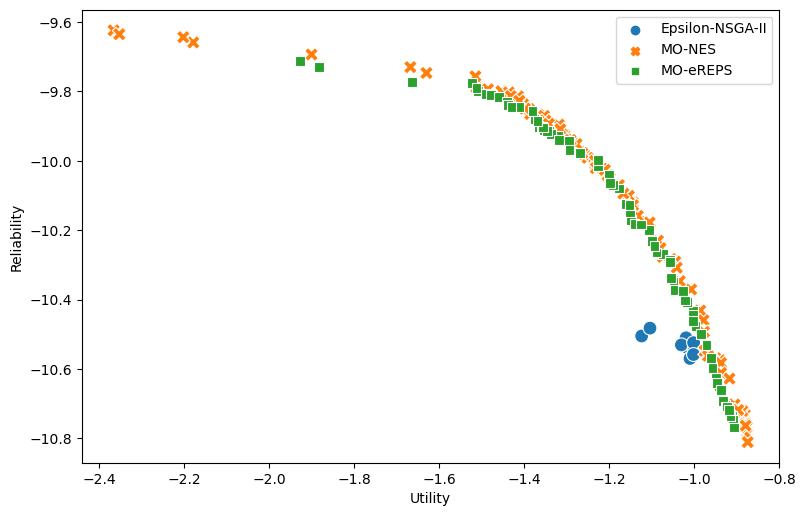

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [18]:
ea_avg=[]
for i in range(11, 29):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea_avg.append(all_outcomes)
    print(files[i])
ea_avg=pd.DataFrame(ea_avg)
ea_avg["Algorithms"]="Epsilon-NSGA-II_avg"
ea_avg
# 2:49:00

ea_avg-15-06-2022-14-32_0.tar.gz
ea_avg-15-06-2022-14-32_1.tar.gz
ea_avg-15-06-2022-14-32_10.tar.gz
ea_avg-15-06-2022-14-32_11.tar.gz
ea_avg-15-06-2022-14-32_12.tar.gz
ea_avg-15-06-2022-14-32_13.tar.gz
ea_avg-15-06-2022-14-32_14.tar.gz
ea_avg-15-06-2022-14-32_15.tar.gz
ea_avg-15-06-2022-14-32_16.tar.gz
ea_avg-15-06-2022-14-32_17.tar.gz
ea_avg-15-06-2022-14-32_2.tar.gz
ea_avg-15-06-2022-14-32_3.tar.gz
ea_avg-15-06-2022-14-32_4.tar.gz
ea_avg-15-06-2022-14-32_5.tar.gz
ea_avg-15-06-2022-14-32_6.tar.gz
ea_avg-15-06-2022-14-32_7.tar.gz
ea_avg-15-06-2022-14-32_8.tar.gz
ea_avg-15-06-2022-14-32_9.tar.gz


,utility,reliability,Algorithms
0,-2.162947,-10.205205,Epsilon-NSGA-II_avg
1,-1.866544,-10.282647,Epsilon-NSGA-II_avg
2,-1.498090,-10.294420,Epsilon-NSGA-II_avg
3,-1.020557,-10.498313,Epsilon-NSGA-II_avg
4,-1.064035,-10.427321,Epsilon-NSGA-II_avg
5,-1.046334,-10.460896,Epsilon-NSGA-II_avg
6,-1.033927,-10.503498,Epsilon-NSGA-II_avg
7,-1.024672,-10.485168,Epsilon-NSGA-II_avg
8,-1.024066,-10.478417,Epsilon-NSGA-II_avg
9,-0.991475,-10.534880,Epsilon-NSGA-II_avg


In [22]:
path = files[32]
nes_avg = pd.read_csv(results_path + path)
nes_avg["Algorithms"]="MO-NES_avg"
print(path)
nes_avg
# 0:03:17

nes_avg-15-06-2022-14-50_high.csv


,utility,reliability,Algorithms
0,-1.050756,-10.273884,MO-NES_avg
1,-0.948212,-10.526093,MO-NES_avg
2,-1.079465,-10.214036,MO-NES_avg
3,-1.043594,-10.304363,MO-NES_avg
4,-1.056263,-10.263069,MO-NES_avg
...,...,...,...
107,-1.071525,-10.257650,MO-NES_avg
108,-0.956077,-10.498767,MO-NES_avg
109,-1.235252,-10.002350,MO-NES_avg
110,-1.135203,-10.122698,MO-NES_avg


In [20]:
path = files[32]
repsep_avg = pd.read_csv(results_path + path)
repsep_avg["Algorithms"]="MO-eREPS_avg"
print(path)
repsep_avg
# 0:02:30

nes_avg-15-06-2022-14-50_high.csv


,utility,reliability,Algorithms
0,-1.050756,-10.273884,MO-eREPS_avg
1,-0.948212,-10.526093,MO-eREPS_avg
2,-1.079465,-10.214036,MO-eREPS_avg
3,-1.043594,-10.304363,MO-eREPS_avg
4,-1.056263,-10.263069,MO-eREPS_avg
...,...,...,...
107,-1.071525,-10.257650,MO-eREPS_avg
108,-0.956077,-10.498767,MO-eREPS_avg
109,-1.235252,-10.002350,MO-eREPS_avg
110,-1.135203,-10.122698,MO-eREPS_avg


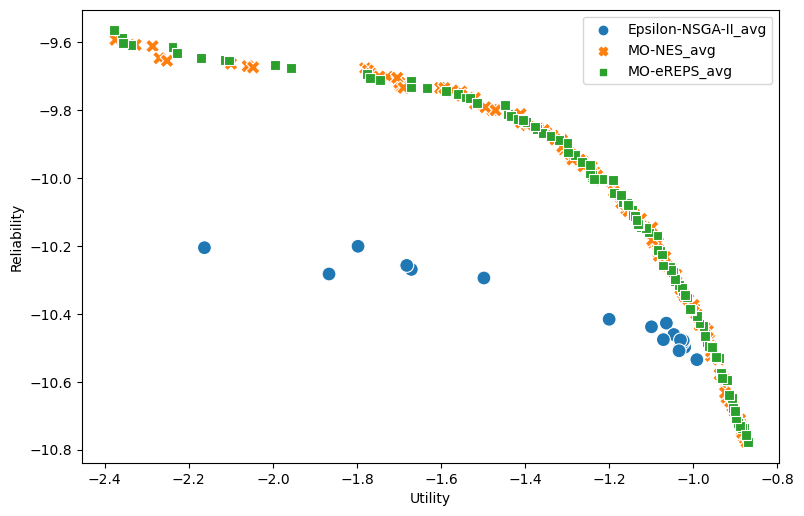

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea_avg, nes_avg, repsep_avg])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()